# Exploring NSL-KDD dataset

* Gain a basic understanding of the data set
* Look at how the data set might be used to predict network anomalies or attacks
* Walk through some fundemental concepts of building machine learning models


In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Welcome!')

Welcome!


# Data extraction


In [2]:
# fetch the training file
file_path_20_percent = 'Dataset/nsl-kdd/KDDTrain+_20Percent.txt'
file_path_full_training_set = 'Dataset/nsl-kdd/KDDTrain+.txt'
file_path_test = 'Dataset/nsl-kdd//KDDTest+.txt' 

#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [3]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:

# Checking for column length mismatch
if len(df.columns) != len(columns):
    print(f"Jumlah kolom di df: {len(df.columns)}, jumlah kolom yang diberikan: {len(columns)}")
    # Optionally print the actual columns to compare
    print(f"Kolom di df: {df.columns}")
else:
    df.columns = columns
    print("Kolom berhasil diperbarui.")

# Loop untuk melihat unique values di setiap kolom
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Kolom berhasil diperbarui.
Unique values in column 'duration': [    0  5607   507 ...  5430 11680   679]

Unique values in column 'protocol_type': ['udp' 'tcp' 'icmp']

Unique values in column 'service': ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Unique values in column 'flag': ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']

Unique values in column 'src_bytes': [  146     0   232 ...  2816 11466  23

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [6]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


# Data transformations


In [7]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


classify each of the attacks 
* Denial of Service attacks:
  * apache2
  * back
  * land
  * neptune
  * mailbomb
  * pod
  * processtable
  * smurf
  * teardrop
  * udpstorm
  * worm
* Probe attacks:
  * ipsweep
  * mscan
  * nmap
  * portsweep
  * saint
  * satan
* Privilege escalation attacks
  * buffer_overflow
  * loadmdoule
  * perl
  * ps
  * rootkit
  * sqlattack
  * xterm
* Remote access attacks
  * ftp_write
  * guess_passwd
  * http_tunnel
  * imap
  * multihop
  * named
  * phf
  * sendmail
  * snmpgetattack
  * snmpguess
  * spy
  * warezclient
  * warezmaster
  * xclock
  * xsnoop

In [8]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


# Data profiling


In [9]:
# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [10]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   



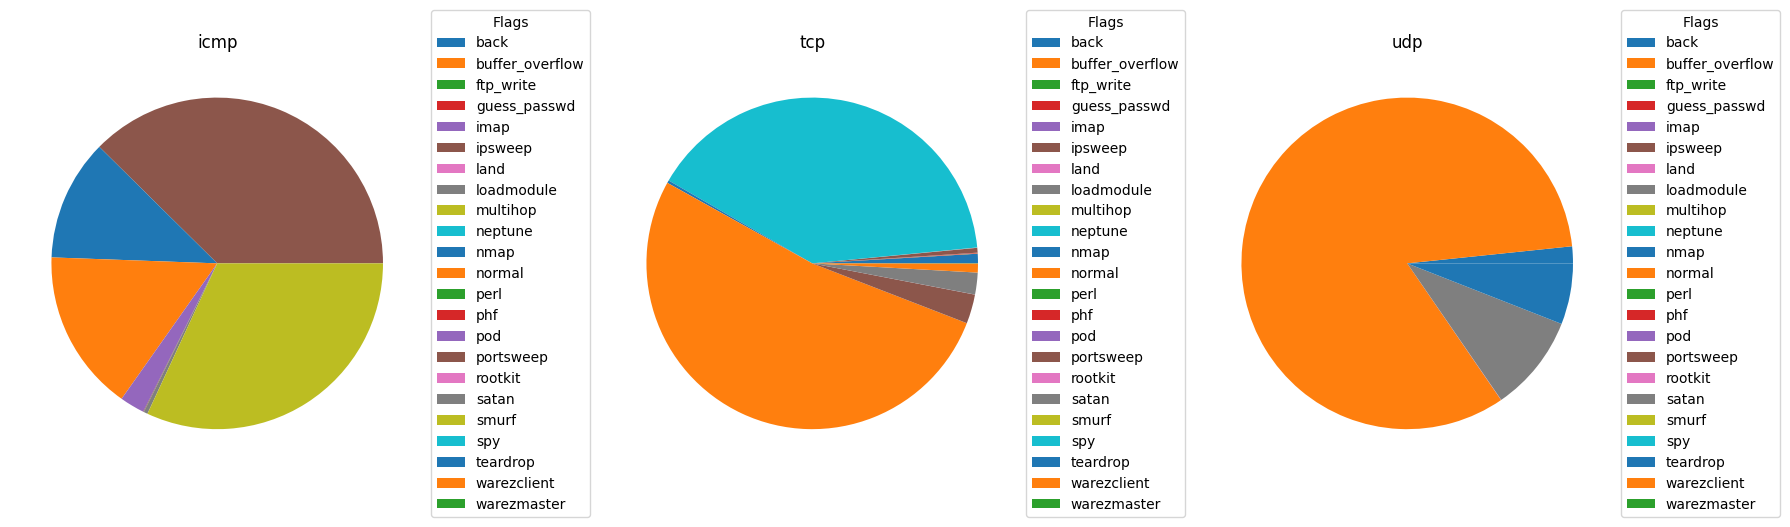

In [11]:
# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

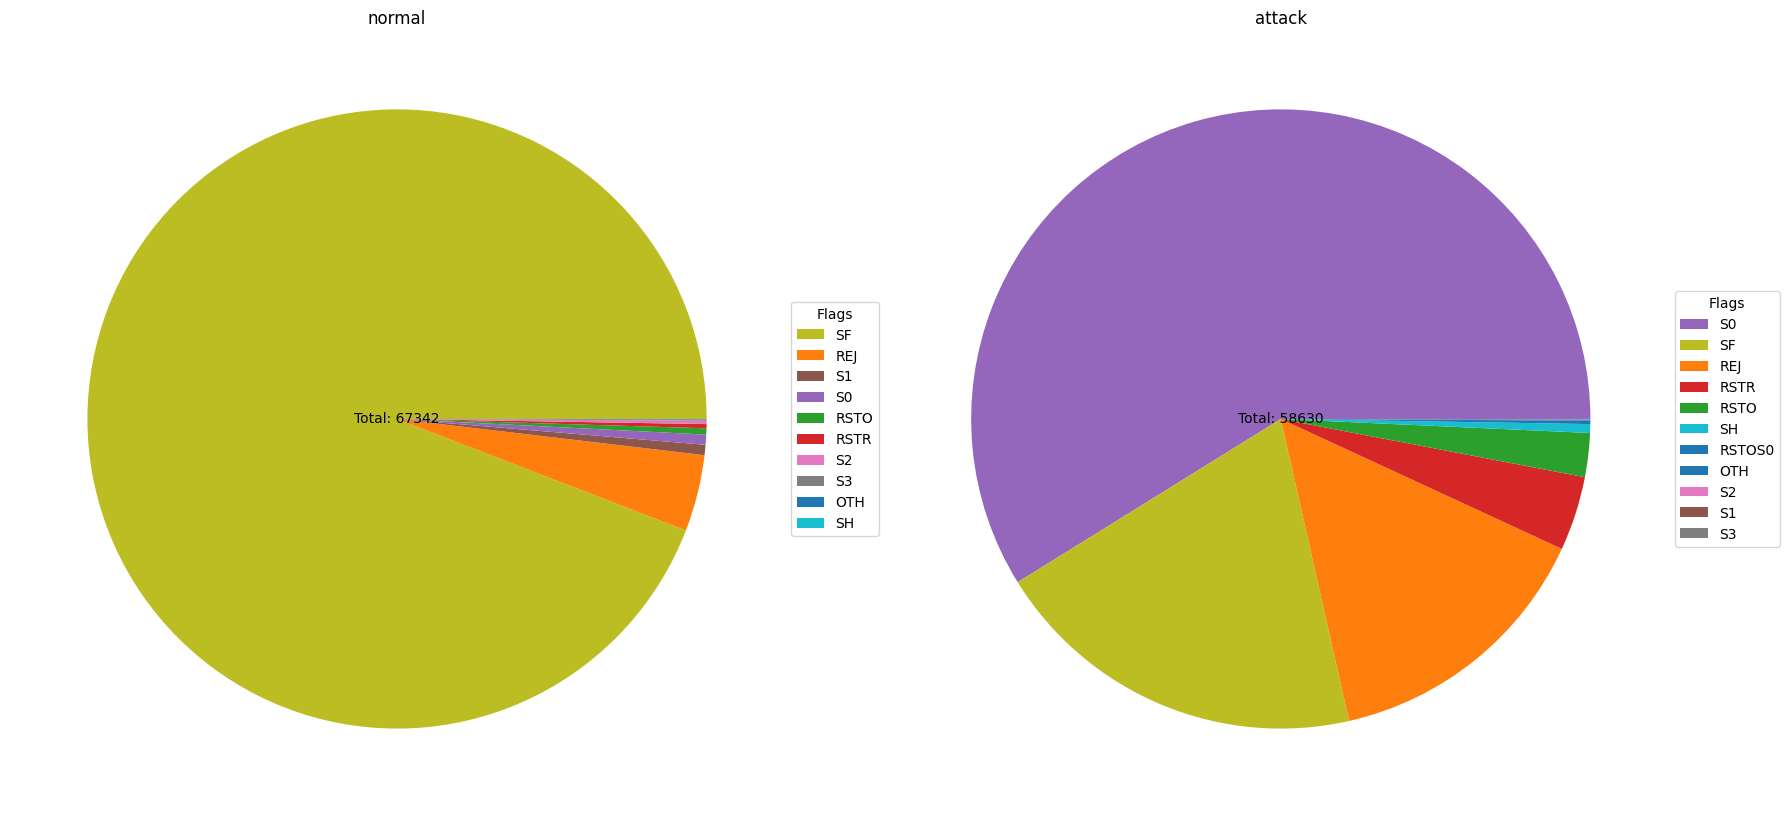

In [12]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])    
# Tambahkan label nilai total di tengah setiap pie chart
for ax, flags in zip(flag_axs, [normal_flags, attack_flags]):
    total = flags.sum()
    ax.text(0, 0, f'Total: {total}', ha='center', va='center', fontsize=10)  
        
plt.show()

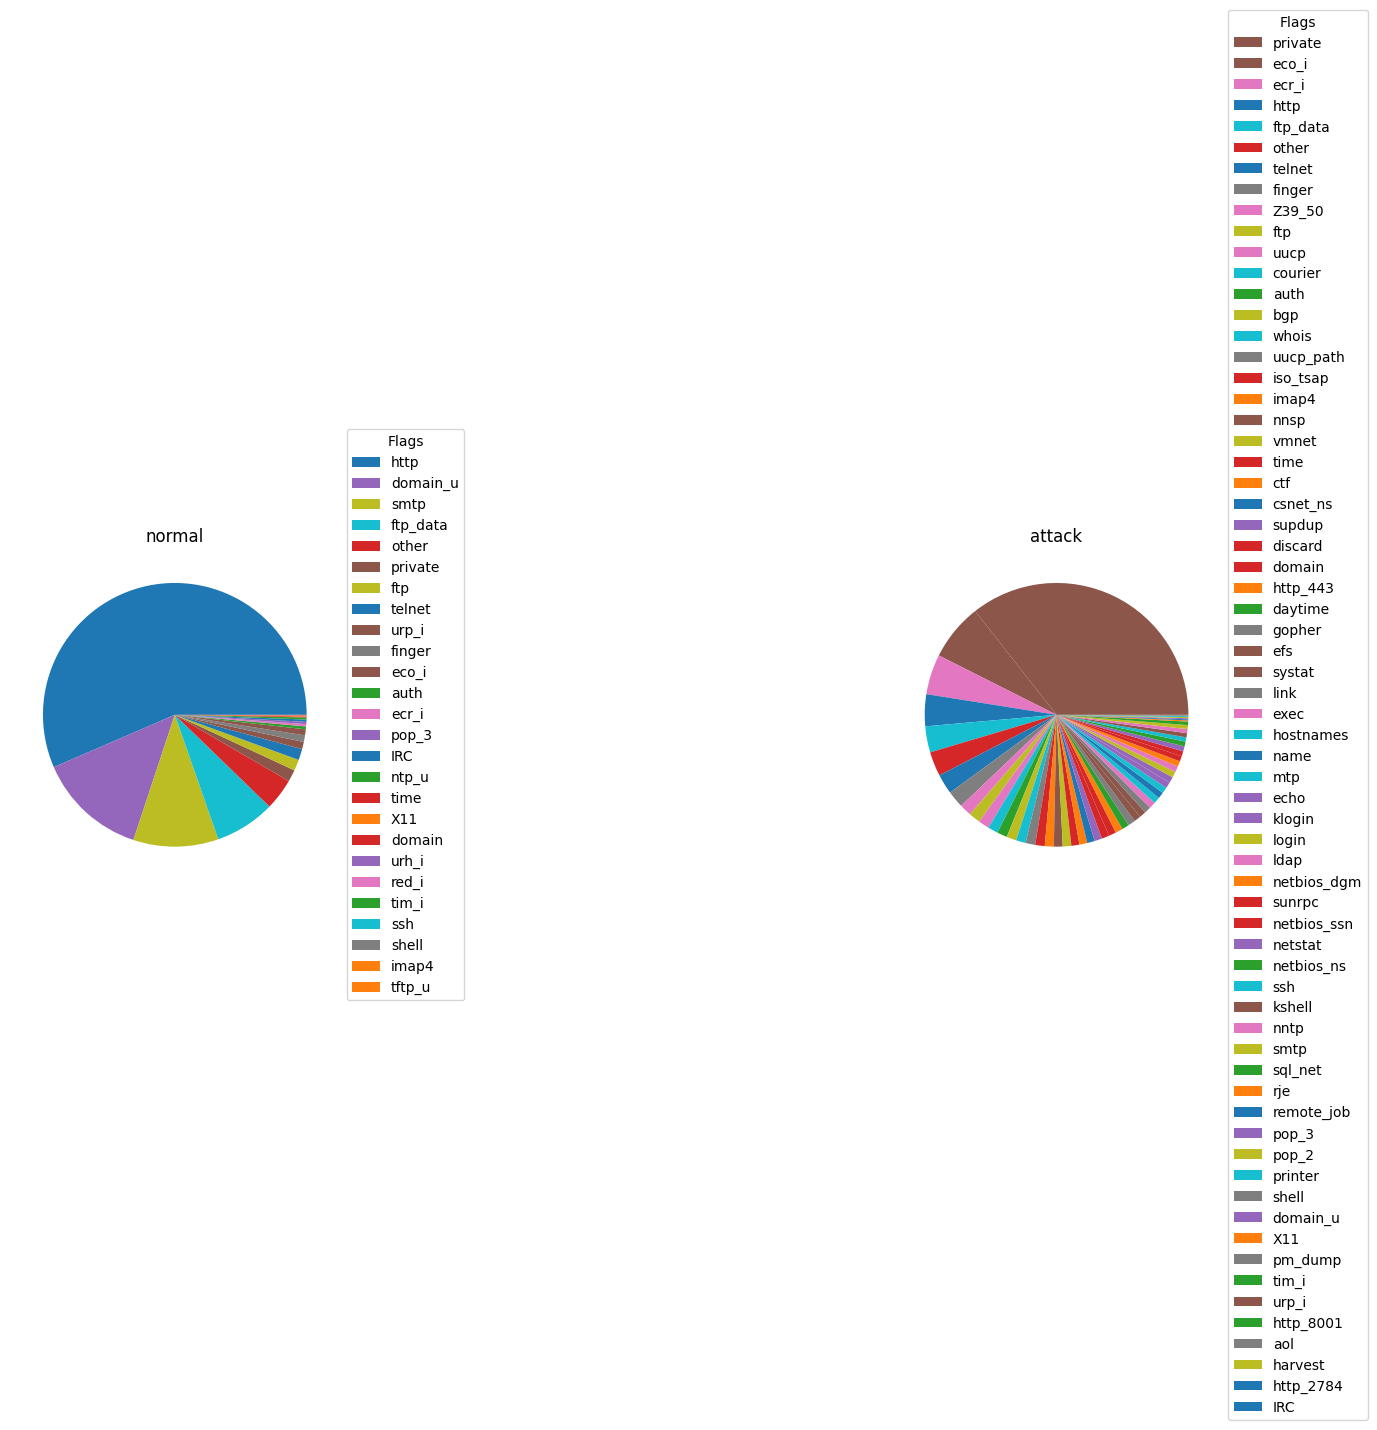

In [13]:
# get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()


# Feature engineering

In [14]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [15]:
# create our target classifications
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.6)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)

In [16]:
# model for the binary classification
binary_model = RandomForestClassifier()
binary_model.fit(binary_train_X, binary_train_y)
binary_predictions = binary_model.predict(binary_val_X)

# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,binary_val_y)
base_rf_score

0.992696867061812

In [17]:
# define the list of models that we want to test
models = [
    # RandomForestClassifier(),
    # LogisticRegression(max_iter=250),
    KNeighborsClassifier(),
    XGBClassifier(),
]

# an empty list to capture the performance of each model
model_comps = []

# walk through the models and populate our list
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, binary_train_X, binary_train_y, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps.append((model_name, count, accuracy))

<Axes: >

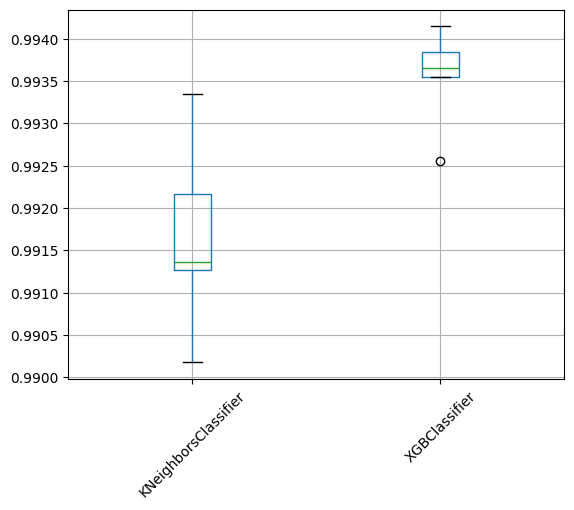

In [18]:
# a box plot will do well to show us overall performance and the variation in the models.
result_df = pd.DataFrame(model_comps, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count',columns='model_name',values='accuracy').boxplot(rot=45)

# Analyzing our predictions
 

In [19]:
# a helper function for getting some analytical data about our predictions
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    
    return prediction_data


<Axes: >

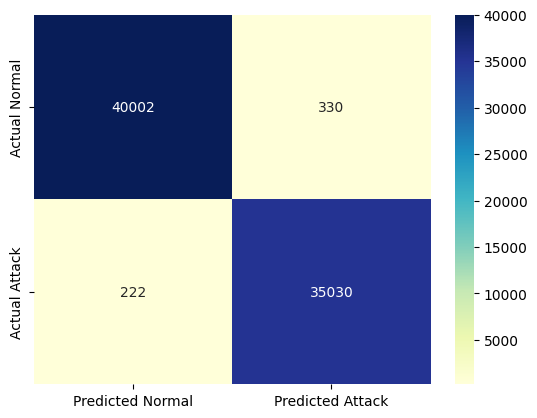

In [20]:
# capture our prediction data
binary_prediction_data = add_predictions(df,
                                         binary_predictions,
                                         binary_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [21]:
# dataframe to store incorrect classification
binary_prediction_data['errors'].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag,attack_map,predicted,actual
count,552.000000,552.000000,552.00000,552.000000,552.0,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,8.298913,192.038043,2426.78442,0.010870,0.0,0.003623,0.153986,0.001812,0.097826,0.150362,...,0.048587,0.098170,0.033188,0.327826,0.344384,14.873188,0.402174,0.655797,0.597826,0.402174
std,51.593618,2409.424494,34072.14824,0.103783,0.0,0.060138,1.109202,0.042563,0.297349,1.907346,...,0.160886,0.229876,0.142148,0.449644,0.460021,5.845737,0.490781,1.015847,0.490781,0.490781
min,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.050000,0.010000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000
max,718.000000,54540.000000,649186.00000,1.000000,0.0,1.000000,18.000000,1.000000,1.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,4.000000,1.000000,1.000000


In [22]:
# data minus the rows with no variance
binary_prediction_data['non_zeros'].describe()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag,attack_map,predicted,actual
count,552.000000,552.000000,552.00000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,8.298913,192.038043,2426.78442,0.010870,0.003623,0.153986,0.001812,0.097826,0.150362,0.025362,...,0.048587,0.098170,0.033188,0.327826,0.344384,14.873188,0.402174,0.655797,0.597826,0.402174
std,51.593618,2409.424494,34072.14824,0.103783,0.060138,1.109202,0.042563,0.297349,1.907346,0.157366,...,0.160886,0.229876,0.142148,0.449644,0.460021,5.845737,0.490781,1.015847,0.490781,0.490781
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.050000,0.010000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000
max,718.000000,54540.000000,649186.00000,1.000000,1.000000,18.000000,1.000000,1.000000,38.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,4.000000,1.000000,1.000000


In [46]:
# # see the standard deviation of the false positives
# binary_prediction_data['false_positives'].std()

In [24]:
# # see the standard deviation of the false negatives
# binary_prediction_data['false_negatives'].std()

<Axes: xlabel='attack'>

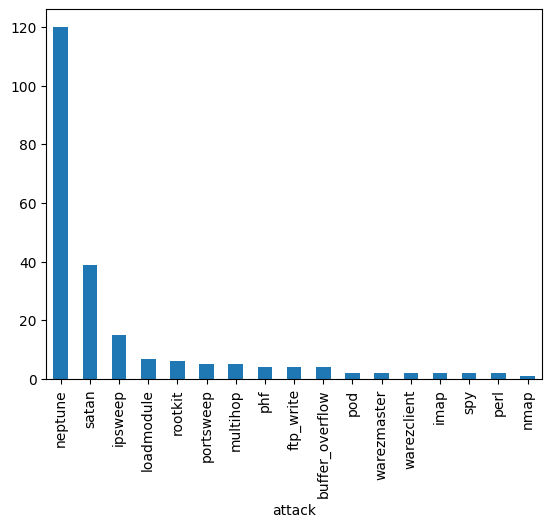

In [25]:
# distribution of false negatives--what attacks did we miss?
binary_prediction_data['false_negatives'].attack.value_counts().plot.bar()

In [26]:
# we'll need to pull these from the data set
outcomes = ['attack_flag','attack_map', 'actual']

# get the new features we're interested in and drop the outcomes
new_features = (binary_prediction_data['false_positives']==0).all(axis=0)
feature_cols = binary_prediction_data['false_positives'].loc[:,new_features]
feature_cols = feature_cols.drop(outcomes,axis=1)

# Let's get these in a list and take a look
new_feature_columns = list(feature_cols.columns)
new_feature_columns

['urgent',
 'num_failed_logins',
 'su_attempted',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login']

In [27]:
# add the new freatures
to_fit_new_features = to_fit.join(df[new_feature_columns])

# build the training sets
new_feature_train_X, new_feature_val_X, new_feature_train_y, new_feature_val_y = train_test_split(to_fit_new_features, binary_y)

In [28]:
# model for the binary classification
new_feature_model = RandomForestClassifier()
new_feature_model.fit(new_feature_train_X, new_feature_train_y)
new_feature_predictions = new_feature_model.predict(new_feature_val_X)

# get the score for the model
new_feature_score = accuracy_score(new_feature_predictions,new_feature_val_y)

new_feature_score

0.9934906169624996

<Axes: >

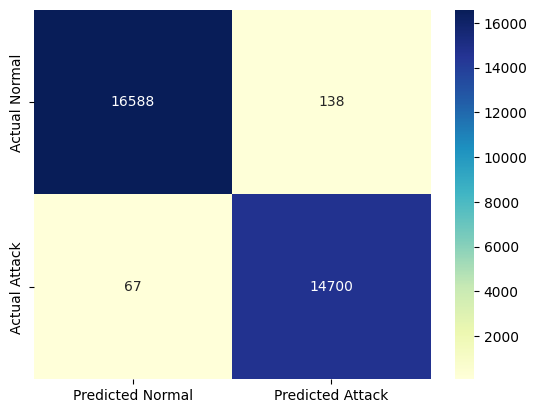

In [29]:
# capture the prediction data
new_prediction_data = add_predictions(df,
                                      new_feature_predictions,
                                      new_feature_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=new_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

<Axes: xlabel='attack'>

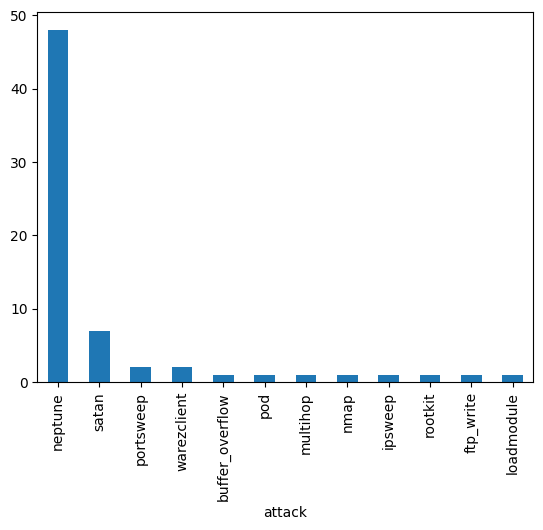

In [30]:
# distribuition of the false negatives--what attacks did we miss?
new_prediction_data['false_negatives'].attack.value_counts().plot.bar()

Now it's time to for the real thing. Let's run our model against some unseen data. We can think of this as new network traffic.

We will fit our model on full dataset and then run it against the test set to see how we did. 

In [31]:
# model for the binary classification
full_model = RandomForestClassifier(random_state=1)
full_model.fit(to_fit, binary_y)
full_predictions = full_model.predict(test_set)

# get the score
full_score = accuracy_score(full_predictions,test_binary_y)
full_score

0.8035753892560884

<Axes: >

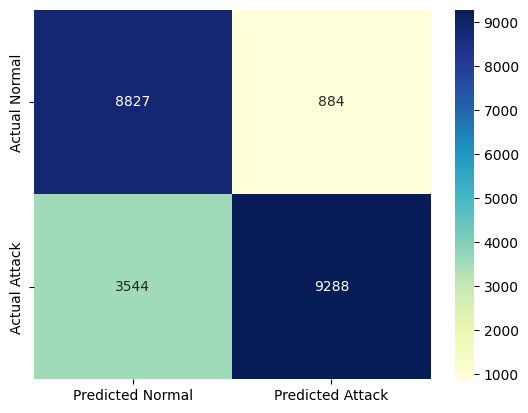

In [32]:
# capture the prediction data
full_prediction_data = add_predictions(test_df, full_predictions, test_binary_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=full_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [33]:
# create our label encoder
label_encoder = LabelEncoder()

# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'flag']
dummy_encoded = pd.get_dummies(df[features_to_encode])
test_dummy_encoded = pd.get_dummies(test_df[features_to_encode])

# now we'll label encode the service column
label_encoder.fit(df.service)
dummy_encoded['service'] = label_encoder.transform(df.service)
test_dummy_encoded['service'] = label_encoder.transform(test_df.service)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = dummy_encoded.join(df[numeric_features])
test_set = test_dummy_encoded.join(test_df[numeric_features])

# make sure our columns match
print(to_fit.columns)
print(test_set.columns)

Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
       'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH',
       'service', 'duration', 'src_bytes', 'dst_bytes'],
      dtype='object')
Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
       'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH',
       'service', 'duration', 'src_bytes', 'dst_bytes'],
      dtype='object')


In [34]:
# model for the binary classification
full_model = RandomForestClassifier(random_state=1)
full_model.fit(to_fit, binary_y)
full_predictions = full_model.predict(test_set)

# get the score
full_score = accuracy_score(full_predictions,test_binary_y)
full_score

0.7955462893137559

Let's try it with the additional features.

In [35]:
# add new features
to_fit_new_features = to_fit.join(df[new_feature_columns])
test_set_new_features = test_set.join(test_df[new_feature_columns])

In [36]:
# run the model
full_model.fit(to_fit_new_features,binary_y)
full_predictions = full_model.predict(test_set_new_features)

# get the score
full_score = accuracy_score(full_predictions,test_binary_y)
full_score

0.7963891230093599

In [37]:
# model for the mulit classification
multi_model = RandomForestClassifier()
multi_model.fit(multi_train_X, multi_train_y)
multi_predictions = multi_model.predict(multi_val_X)

# get the score
accuracy_score(multi_predictions,multi_val_y)

0.9763574301439458

Now let's add the new features.

In [38]:
# build the training sets
multi_feature_train_X, multi_feature_val_X, multi_feature_train_y, multi_feature_val_y = train_test_split(to_fit_new_features, multi_y)

In [39]:
# model for the mulit classification
multi_model = RandomForestClassifier()
multi_model.fit(multi_feature_train_X, multi_feature_train_y)
multi_predictions = multi_model.predict(multi_feature_val_X)

# get the score
accuracy_score(multi_predictions,multi_feature_val_y)

0.9765662210649986

<Axes: >

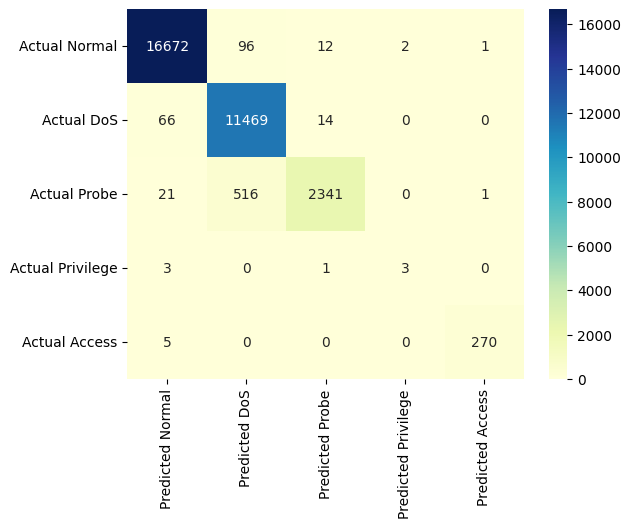

In [40]:
# capture the prediction data
multi_prediction_data = add_predictions(df, multi_predictions, multi_feature_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted ' + x for x in attack_labels],
            yticklabels = ['Actual ' + x for x in attack_labels],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [41]:
# fit on the full data set
multi_model.fit(to_fit_new_features, multi_y)
full_multi_predictions = multi_model.predict(test_set_new_features)

# get the score
accuracy_score(full_multi_predictions,test_multi_y)

0.7283413920063878

In [42]:
# run the model on the smaller column set
multi_model.fit(to_fit, multi_y)
full_multi_predictions = multi_model.predict(test_set)

# get the score
accuracy_score(full_multi_predictions,test_multi_y)

0.7545135962383002

<Axes: >

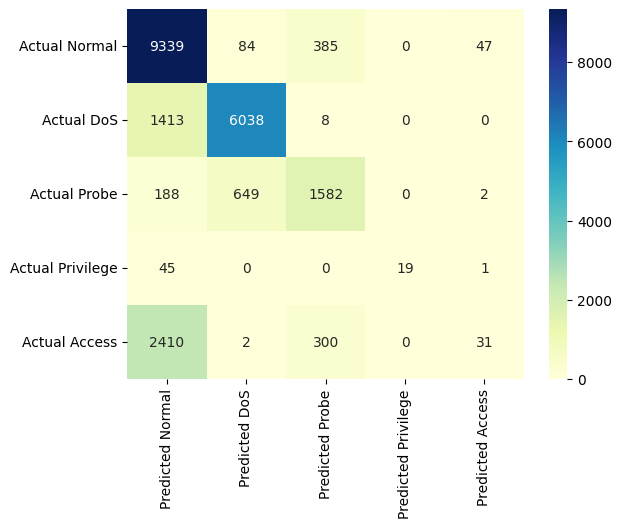

In [43]:
# build our prediction data
multi_prediction_data = add_predictions(df, full_multi_predictions, test_multi_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted ' + x for x in attack_labels],
            yticklabels = ['Actual ' + x for x in attack_labels],
            cmap="YlGnBu",
            fmt='d',
            annot=True)